# Transfer function  3D-Plot

In this demo you can draw the 3d plot of a transfer function $\mid H(z)\mid = \frac{\sum\limits_{i= 0}^{n} b_i z^{i}}{\sum\limits_{i= 0}^{n} a_i z^{i}}$. In a pole (denominator becomes 0) the transfer function goes to infinity, in a zero (numerator becomes 0) the transfer function becomes 0.

Enter numerator(e.g. s^2 + s -> 1,1,0): 1,1
Enter denominator(as s^2 + s -> 1,1,0): 1,2,2,1
1.0


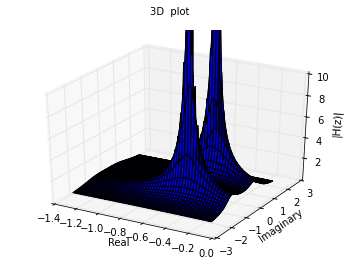

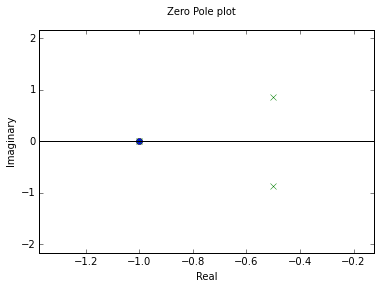

In [1]:
from A3dPlotTransfertFunction_V2 import *
%matplotlib inline
# A method for evaluating the transfer function using Horner scheme.
def evaluate_fractional_polynomal(num,den,x,y):
    Z = x + y*1j
    numerator = num[0]
    for k in range(1,len(num)):
        numerator = (numerator * Z)+num[k]
    denominator = den[0]
    for l in range(1,len(den)):
        denominator = (denominator*Z) + den[l]
    return numerator/denominator

# Handeling user input
num = input_handler("Enter numerator(e.g. s^2 + s -> 1,1,0): ")
den = input_handler("Enter denominator(as s^2 + s -> 1,1,0): ")
# Calculation the zero and poles by converting transferfunction to zero pole representation. (ref: H5-Continu Time systems, Transfert Function)
z,p,k = sig.tf2zpk(num,den)
# Calculation optimal ranges for drawing
x_min,x_max,y_min,y_max,z_min,z_max = dynamic_axis(z,p,k)
X = np.arange(x_min, x_max, (x_max-x_min)/2**9)
Y = np.arange(y_min, y_max, (y_max-y_min)/2**9)
xx,yy = np.meshgrid(X,Y)
# Evaluate function for the given points
zz = np.abs(evaluate_fractional_polynomal(num,den,xx,yy))
# Plotting 3d plot
draw_3d_plot(xx,yy,zz,z_min,z_max)
# Plotting zero-pole diagram
draw_zero_pole(z,p,x_min,x_max,y_min,y_max)